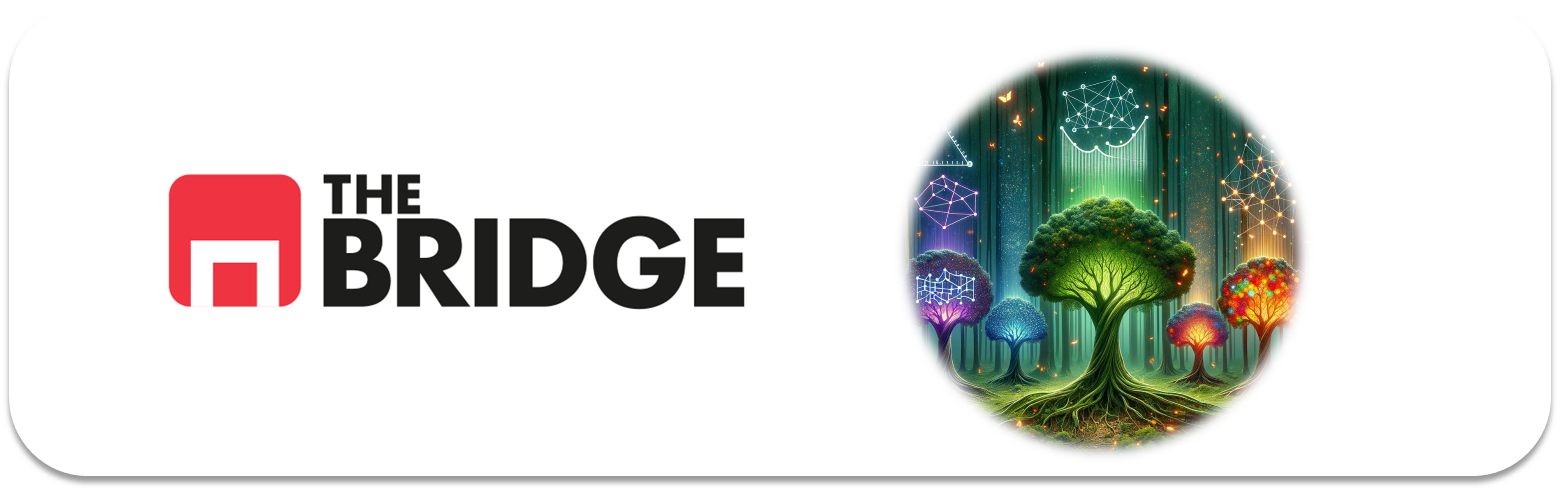

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [90]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url,sep=",")
df.columns = names
df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [92]:
target = "class"


In [110]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
train_set, test2_set =  train_test_split(train_set, test_size= 0.2, random_state= 42)
X_train = train_set.drop("class", axis = 1)
X_test = test_set.drop("class", axis = 1)
X_test2 =test2_set.drop("class", axis = 1)
y_train = train_set["class"]
y_test = test_set["class"]
y_test2 = test2_set["class"]


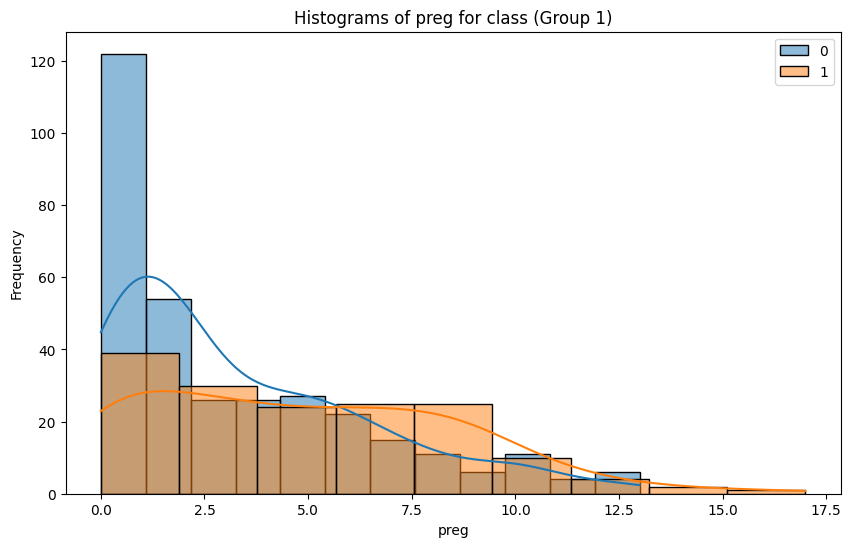

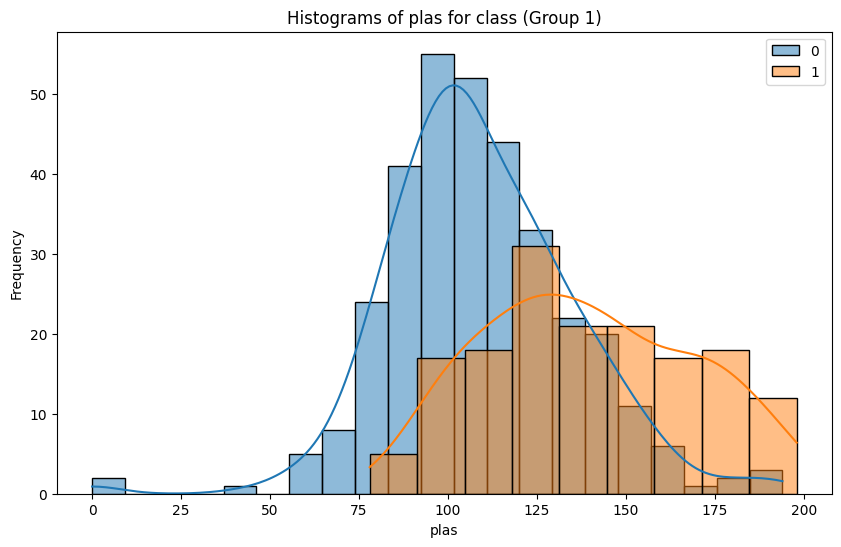

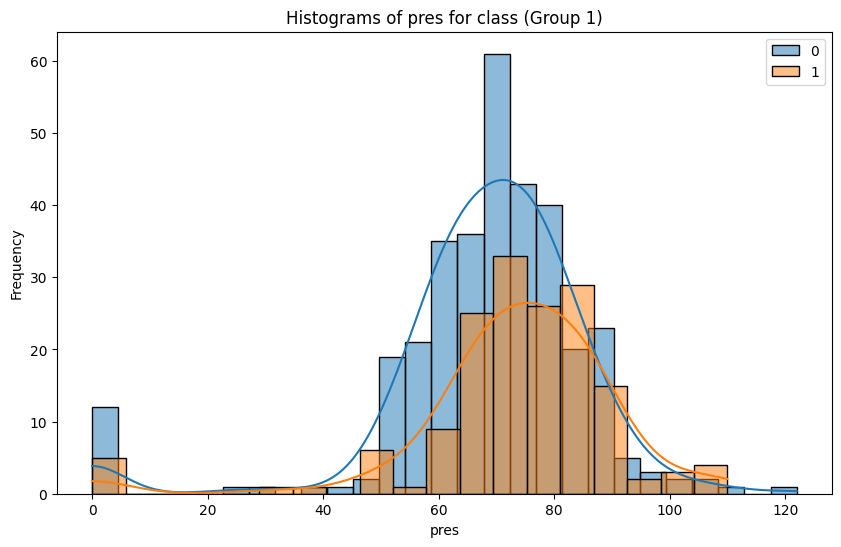

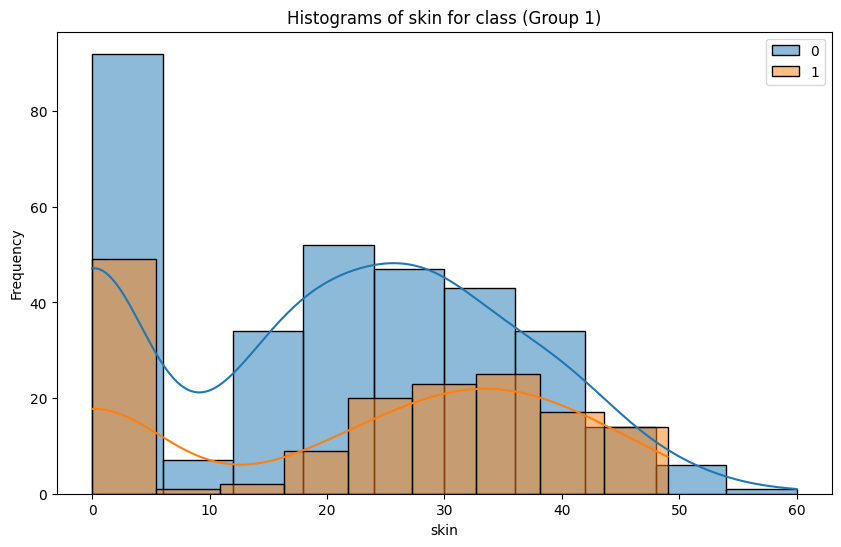

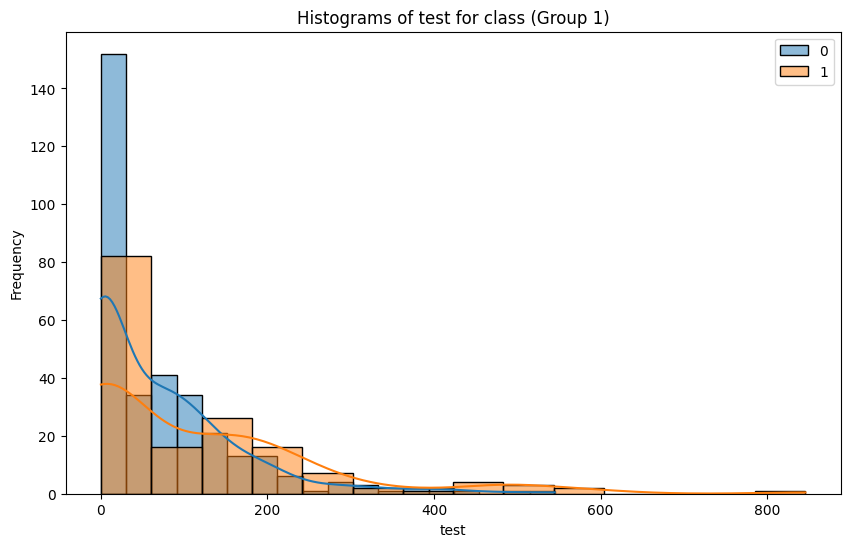

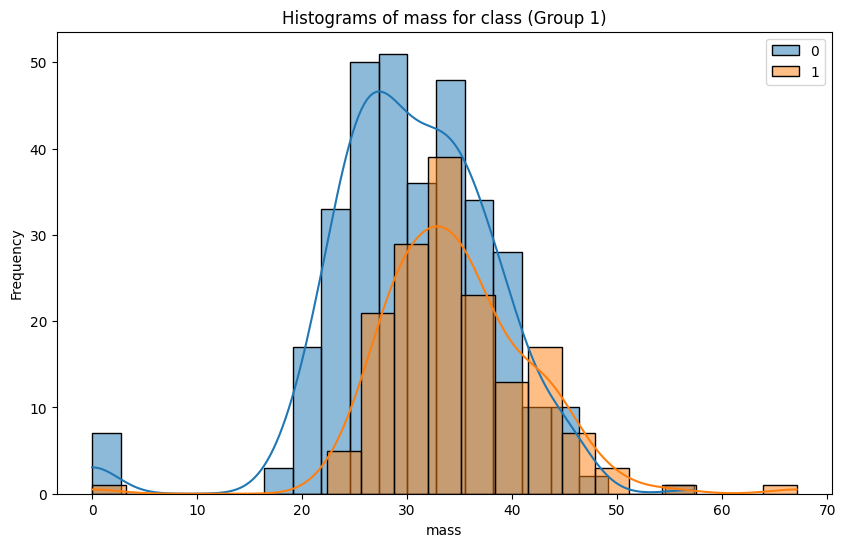

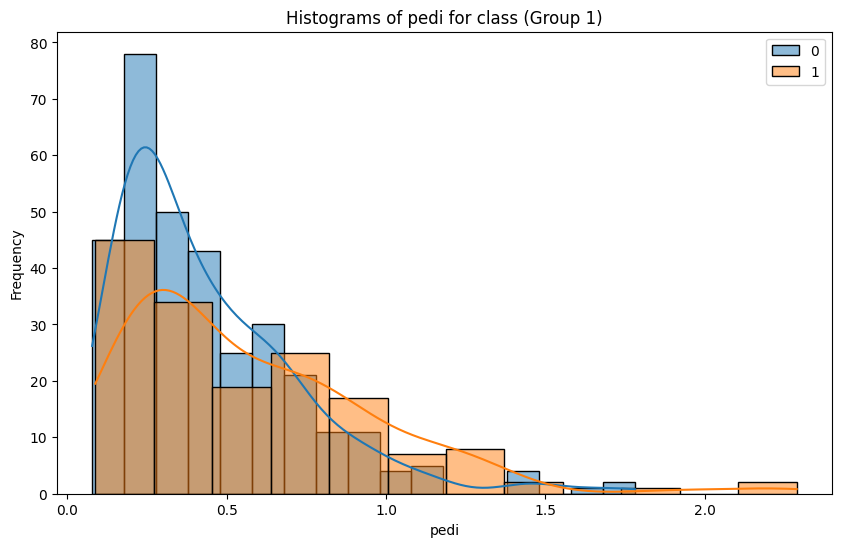

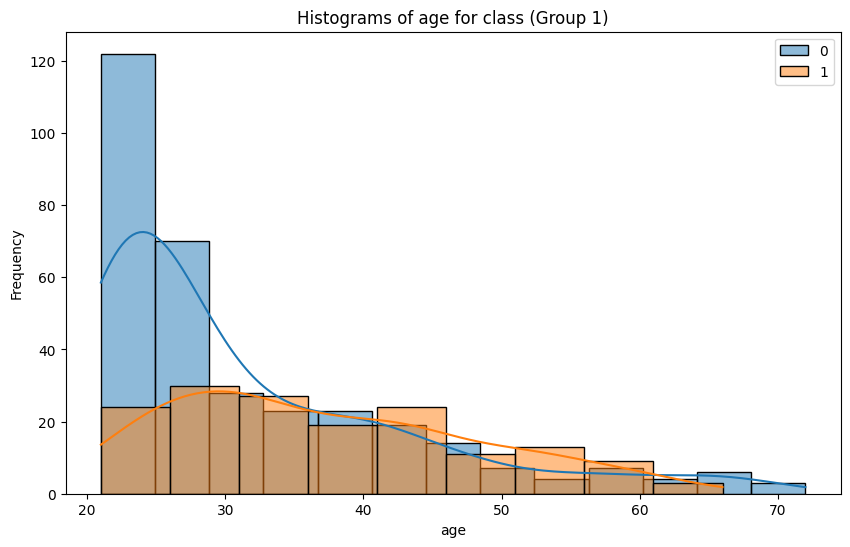

In [94]:

features_num = [col for col in train_set.columns if col != target]
features_num

for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [95]:
train_set["age"] = train_set.age.apply(np.cbrt)
train_set["pedi"] = train_set.pedi.apply(np.cbrt)
test_set["age"] = train_set.age.apply(np.cbrt)
test_set["pedi"] = train_set.pedi.apply(np.cbrt)

In [96]:
model_names = ["DecisionTree","Random Forest","XGBoost"]
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
model_set = [ tree_clf, rf_clf, xgb_clf]

In [97]:
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [98]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [99]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [100]:
y_pred_tree = tree_clf.predict(X_train)
y_pred_rf = rf_clf.predict(X_train)
y_pred_xgb = xgb_clf.predict(X_train)

In [101]:
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_rf))
print("DecisionTree:", accuracy_score(y_train, y_pred_tree))
print("XGBoost Accuracy:", accuracy_score(y_train, y_pred_xgb))

Random Forest Accuracy: 1.0
DecisionTree: 1.0
XGBoost Accuracy: 1.0


Report para DecisionTree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00       160

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

Matriz de Confusión:


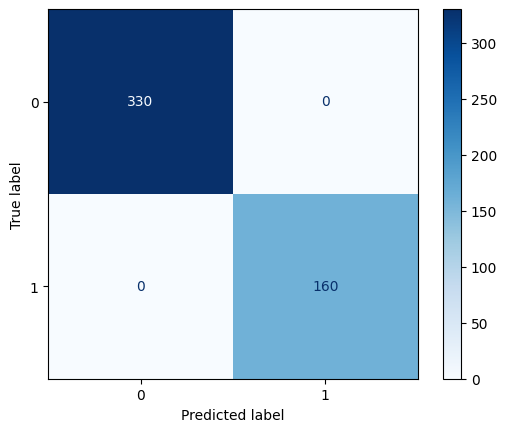

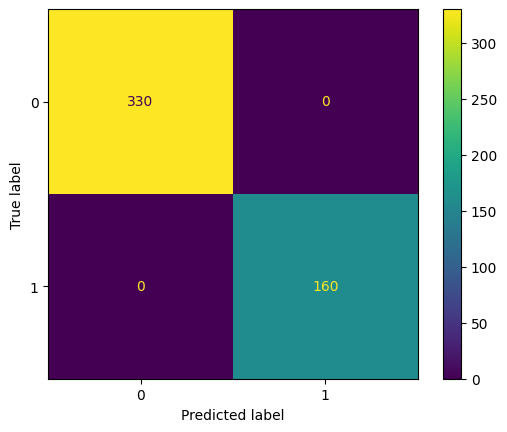




Report para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00       160

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

Matriz de Confusión:


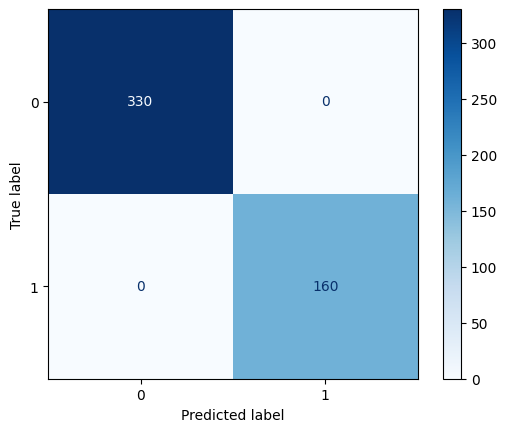

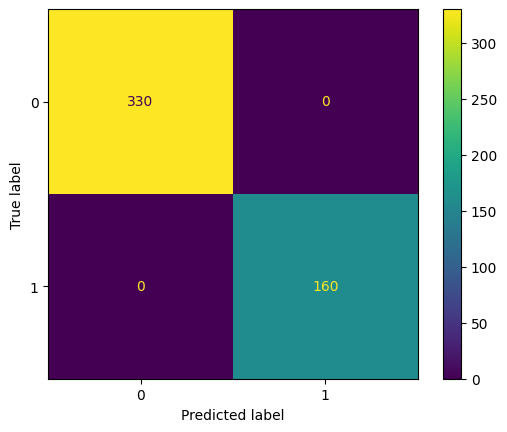




Report para XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00       160

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

Matriz de Confusión:


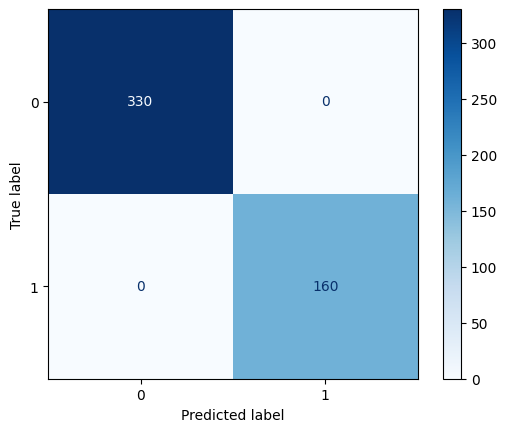

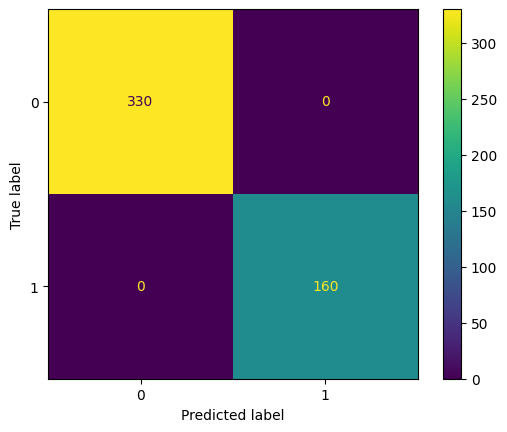

In [102]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
for nombre, modelo in zip(["DecisionTree", "Random Forest", "XGBoost"], [tree_clf, rf_clf, xgb_clf]):
    print(f"Report para {nombre}:")
    print(classification_report(y_train, modelo.predict(X_train)))
    print("Matriz de Confusión:")
    ConfusionMatrixDisplay.from_estimator(modelo, X_train, y_train, cmap="Blues").plot()
    plt.show()
    print("\n\n")


In [103]:
print(y_train.value_counts())

class
0    330
1    160
Name: count, dtype: int64


In [104]:
print(X_train.head())

     preg  plas  pres  skin  test  mass   pedi  age
111     1    89    76    34    37  31.2  0.192   23
157     2    88    74    19    53  29.0  0.229   22
114     4   146    92     0     0  31.2  0.539   61
631     2   111    60     0     0  26.2  0.343   23
412     1   143    74    22    61  26.2  0.256   21


In [105]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [106]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("DecisionTree:", accuracy_score(y_test, y_pred_tree))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Random Forest Accuracy: 0.8116883116883117
DecisionTree: 0.7272727272727273
XGBoost Accuracy: 0.7467532467532467


Report para DecisionTree:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        97
           1       0.63      0.65      0.64        57

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Matriz de Confusión:


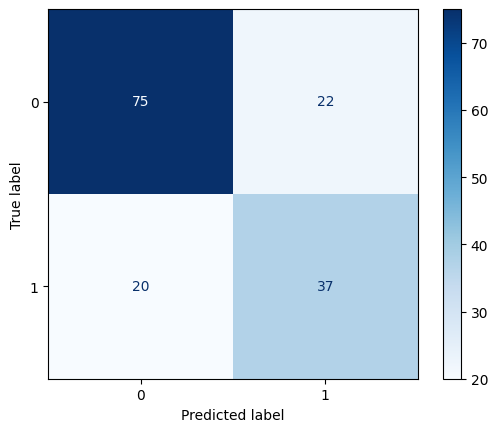

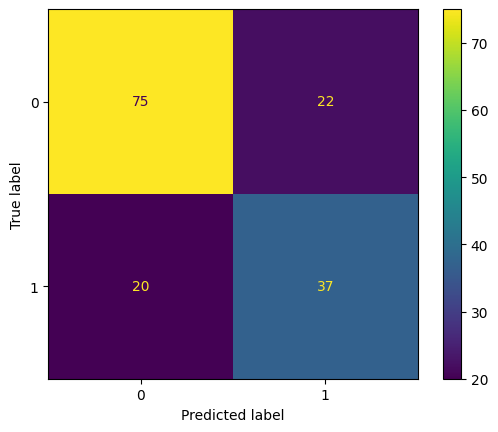




Report para Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        97
           1       0.77      0.70      0.73        57

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154

Matriz de Confusión:


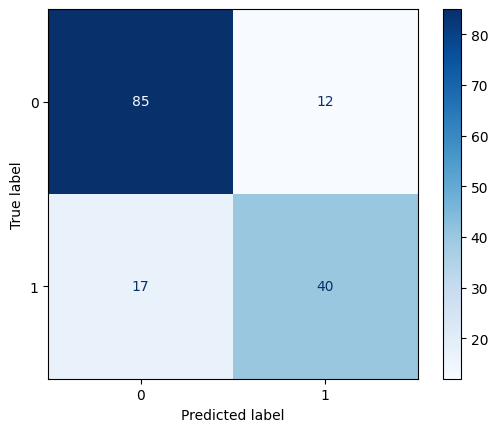

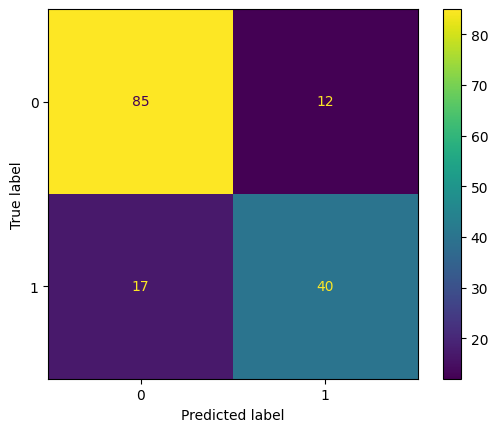




Report para XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        97
           1       0.65      0.68      0.67        57

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Matriz de Confusión:


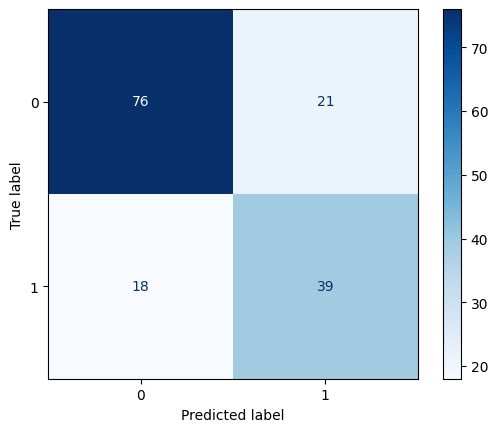

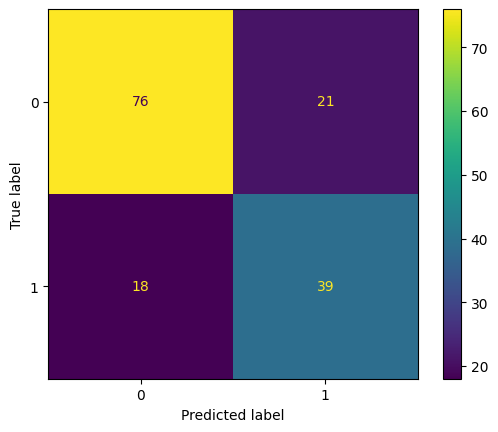

In [107]:

for nombre, modelo in zip(["DecisionTree", "Random Forest", "XGBoost"], [tree_clf, rf_clf, xgb_clf]):
    print(f"Report para {nombre}:")
    print(classification_report(y_test, modelo.predict(X_test)))
    print("Matriz de Confusión:")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, cmap="Blues").plot()
    plt.show()
    print("\n\n")

In [108]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Inicializar el clasificador XGBoost
xgb_model = XGBClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_xgb_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de entrenamiento
y_pred_train = best_xgb_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Precisión en el conjunto de entrenamiento:", accuracy_train)


Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Precisión en el conjunto de entrenamiento: 0.8387755102040816


In [111]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_xgb_model.predict(X_test2)
accuracy_test = accuracy_score(y_test2, y_pred_test)
print("Precisión en el conjunto de prueba:", accuracy_test)


Precisión en el conjunto de prueba: 0.7723577235772358


In [112]:
class_report = classification_report(y_test2, y_pred_test)
print("Reporte de Clasificación:")
print(class_report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        73
           1       0.92      0.48      0.63        50

    accuracy                           0.77       123
   macro avg       0.83      0.73      0.73       123
weighted avg       0.81      0.77      0.75       123

